# <b> <center style="background-color:DodgerBlue;"> ML Assignment-Group 299 </center> </b>

### <b> Assignment – Naïve Bayes </b>

#### Considering the Census Income data with response variable as Income(>50k and <=50k).

- 1. Import the CSV dataset from https://www.kaggle.com/uciml/adult-census-income (Links to an external site.) (Links to an external site.).
- 2. Identify the presence of missing values, fill the missing values with mean for numerical attributes and mode value for categorical attributes. 
- 3. Extract X as all columns except the Income column and Y as the Income column. 
- 4. Split the data into a training set and testing set. 
- 5. Model the classifier using GaussianNB, BernoulliNB, and MultinomialNB 
- 6. Compute the accuracy and confusion matrix for each model. 
- 7. Plot the decision boundary, visualize training and test results of all the models 


#### -*- coding: utf-8 -*-
#### Indentation: Jupyter Notebook

__version__='1.0.0'
__author__="Sourav Raj"
__email__="2020sc04304@wilp.bits-pilani.ac.in"

In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.classifier import roc_auc

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve, confusion_matrix, f1_score

In [215]:
censusIncome=pd.read_csv('adult.csv')
print(censusIncome.shape)
censusIncome.head(2)

(32561, 15)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K


In [216]:
censusIncome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [217]:
censusIncome.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [218]:
for column in censusIncome.columns:
    print(f"{column:} {censusIncome[column].unique()}")
    print(">>>>>>>>>>>>>>>>>>>>>>>>>>>")    

age [90 82 66 54 41 34 38 74 68 45 52 32 51 46 57 22 37 29 61 21 33 49 23 59
 60 63 53 44 43 71 48 73 67 40 50 42 39 55 47 31 58 62 36 72 78 83 26 70
 27 35 81 65 25 28 56 69 20 30 24 64 75 19 77 80 18 17 76 79 88 84 85 86
 87]
>>>>>>>>>>>>>>>>>>>>>>>>>>>
workclass ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
>>>>>>>>>>>>>>>>>>>>>>>>>>>
fnlwgt [ 77053 132870 186061 ...  34066  84661 257302]
>>>>>>>>>>>>>>>>>>>>>>>>>>>
education ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
>>>>>>>>>>>>>>>>>>>>>>>>>>>
education.num [ 9 10  4  6 16 15 13 14  7 12 11  2  3  8  5  1]
>>>>>>>>>>>>>>>>>>>>>>>>>>>
marital.status ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
>>>>>>>>>>>>>>>>>>>>>>>>>>>
occupation ['?' 'Exec-managerial' 'Machine-o

In [219]:
for column in ['workclass', 'occupation', 'native.country']:
    censusIncome[column].replace({'?': None},inplace =True)

In [220]:
censusIncome.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [221]:
censusIncome[['workclass', 'occupation', 'native.country']].isnull().sum()/censusIncome.shape[0]

workclass         0.056386
occupation        0.056601
native.country    0.017905
dtype: float64

In [222]:
for column in ['workclass', 'occupation', 'native.country']:
    censusIncome[column].fillna(censusIncome[column].mode().iloc[0], inplace=True)

In [223]:
censusIncome[['education', 'education.num']].drop_duplicates()

,education,education.num
0,HS-grad,9
2,Some-college,10
3,7th-8th,4
6,10th,6
7,Doctorate,16
11,Prof-school,15
12,Bachelors,13
13,Masters,14
16,11th,7
18,Assoc-acdm,12


In [224]:
censusIncome.drop('education', axis=1, inplace=True)

In [225]:
censusIncome.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028BDB4E8430>,
      dtype=object)

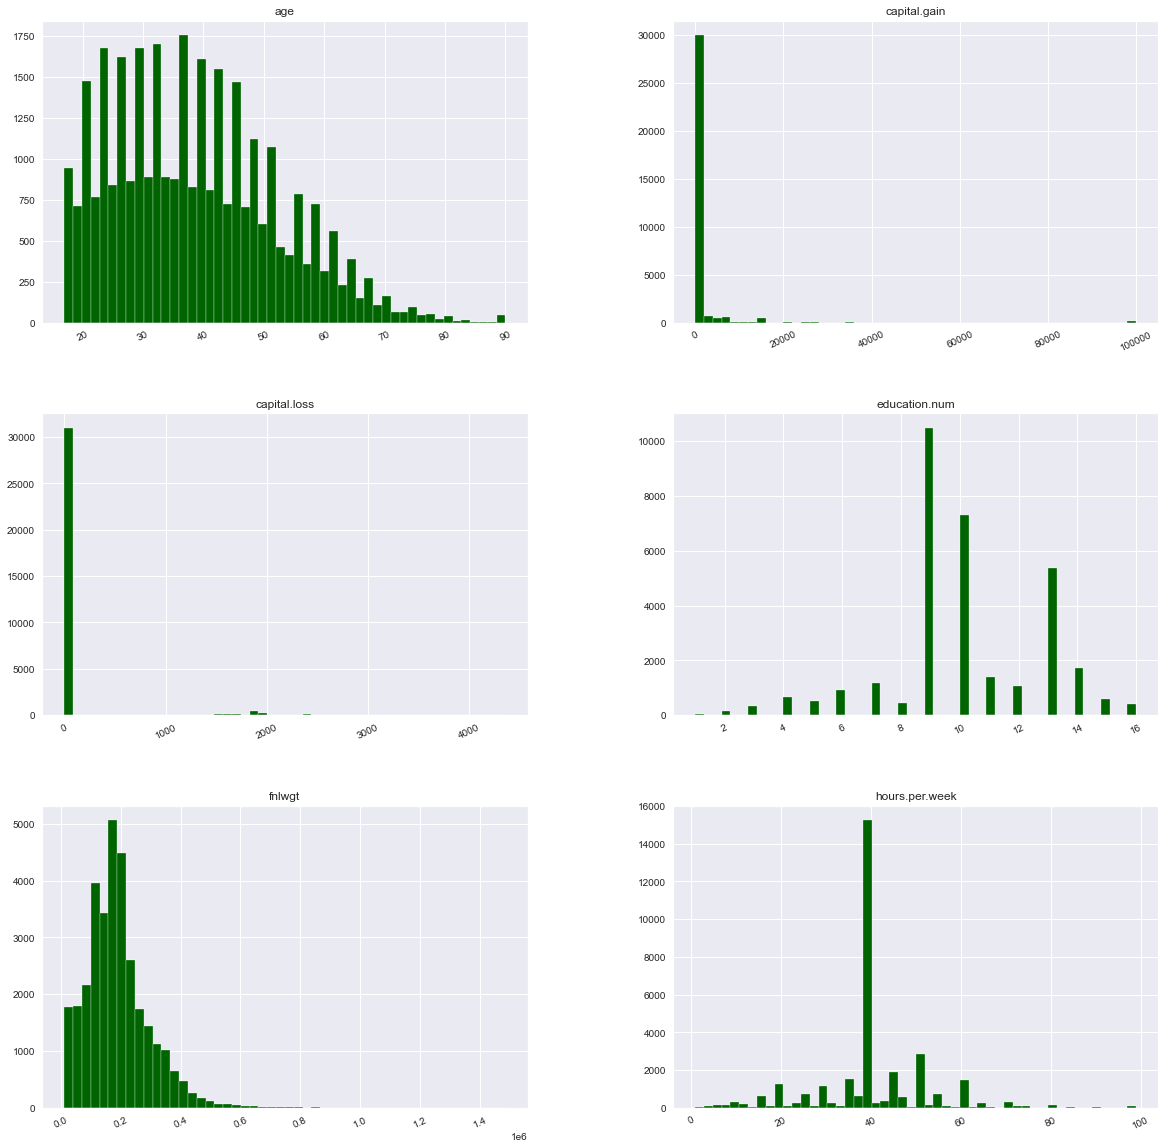

In [226]:
sns.set_style('dark')
censusIncome.hist(bins=50,figsize=(20,20),color='darkgreen', xrot=25, xlabelsize=10)

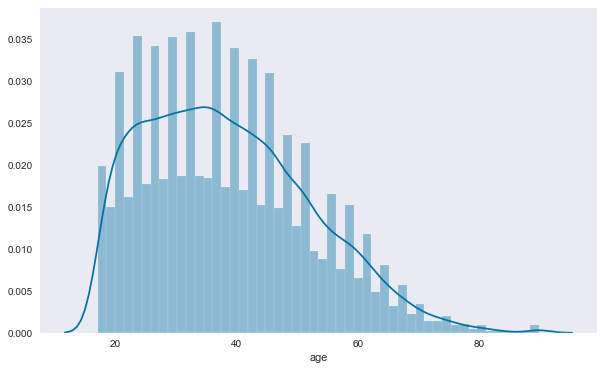

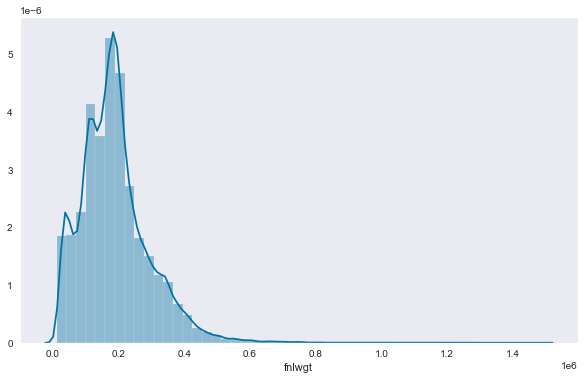

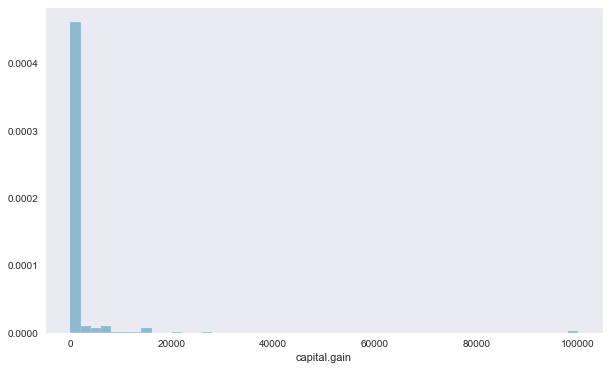

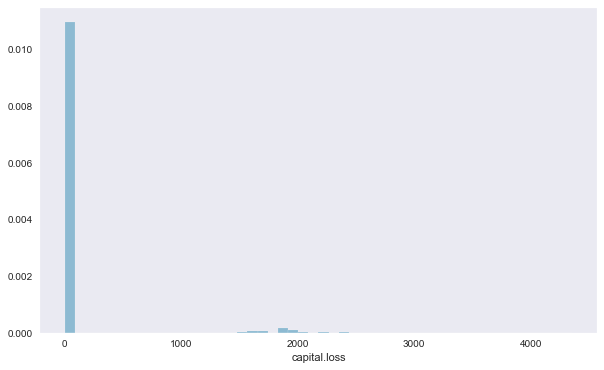

In [227]:
for col in ['age', 'fnlwgt', 'capital.gain', 'capital.loss']:
    fig, ax = plt.subplots(1,1, figsize=(10, 6))
    sns.distplot(censusIncome[col])

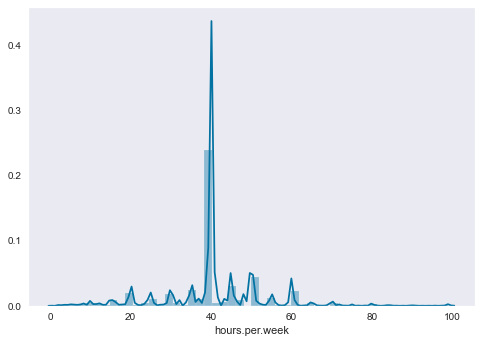

In [228]:
sns.distplot(censusIncome['hours.per.week'])

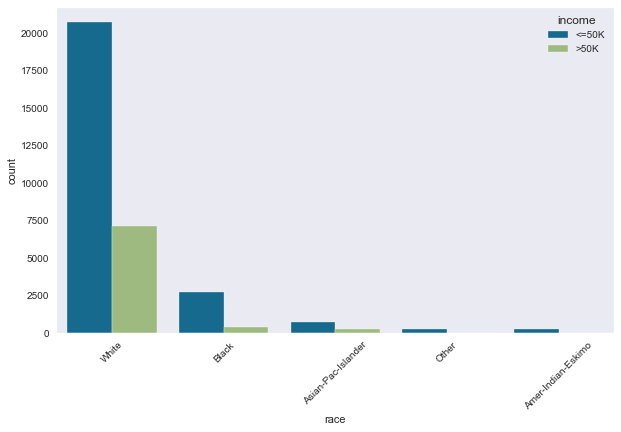

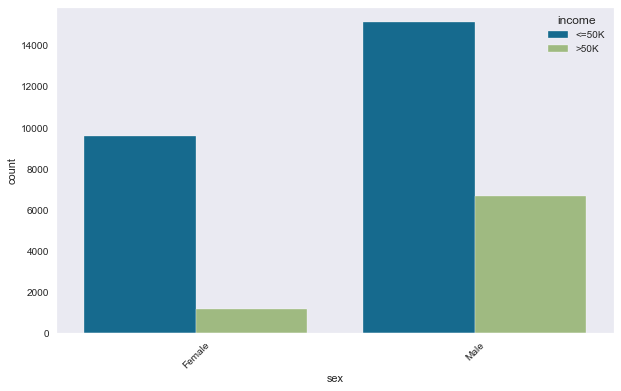

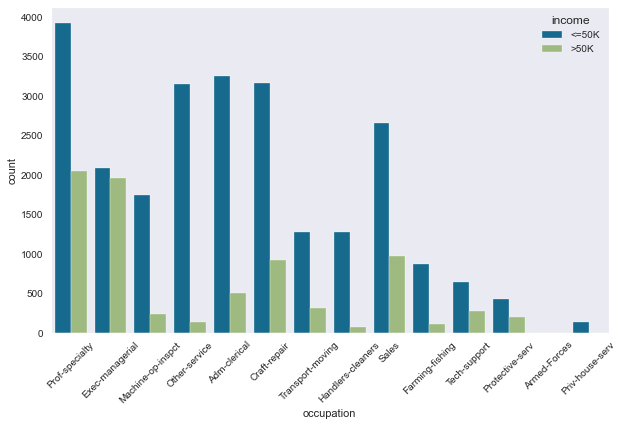

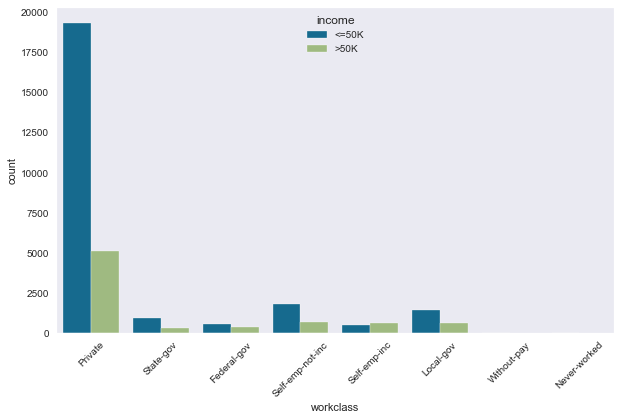

In [229]:
for col in ['race', 'sex', 'occupation', 'workclass']:
    fig, ax = plt.subplots(1,1, figsize=(10, 6))
    sns.countplot(x=col, data=censusIncome, hue='income')
    plt.xticks(rotation=45)
#     plt.show()

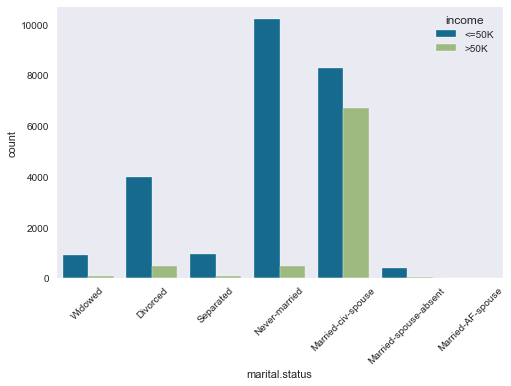

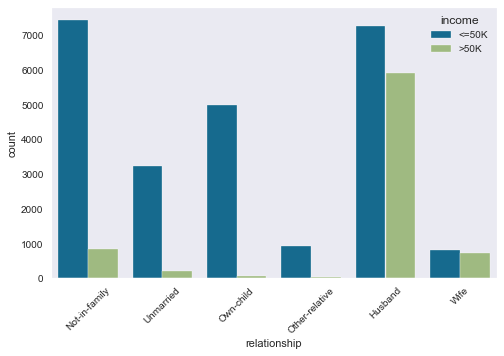

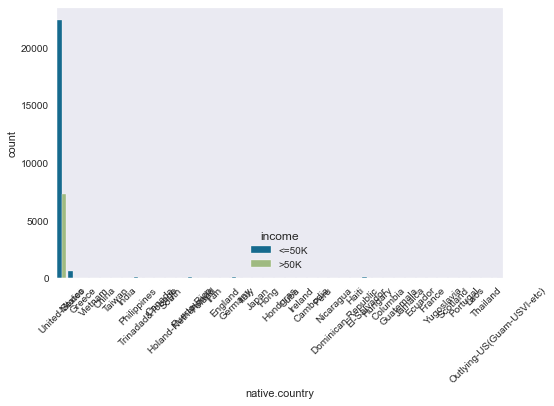

In [230]:
for col in ['marital.status', 'relationship', 'native.country']:
    fig, ax = plt.subplots(1,1, figsize=(8, 5))
    sns.countplot(x=col, data=censusIncome, hue='income', orient=90)
    plt.xticks(rotation=45)
#     plt.show()

In [232]:
# sns.countplot(x='workclass', data=censusIncome[censusIncome['income']==0], orient=90)

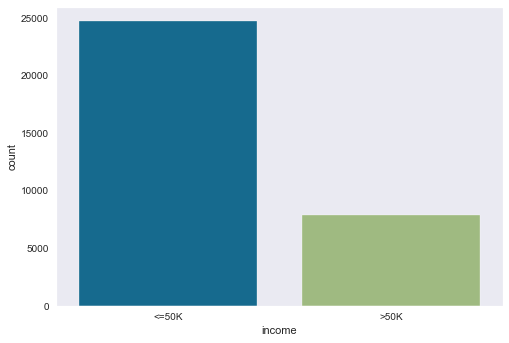

In [233]:
sns.countplot(x='income', data=censusIncome)

In [234]:
censusIncome.income.value_counts()/censusIncome.shape[0]

<=50K    0.75919
>50K     0.24081
Name: income, dtype: float64

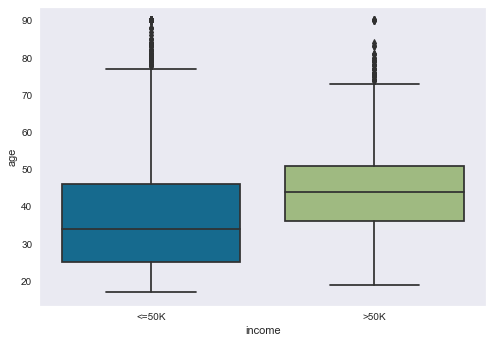

In [235]:
sns.boxplot(x='income', y='age', data=censusIncome)

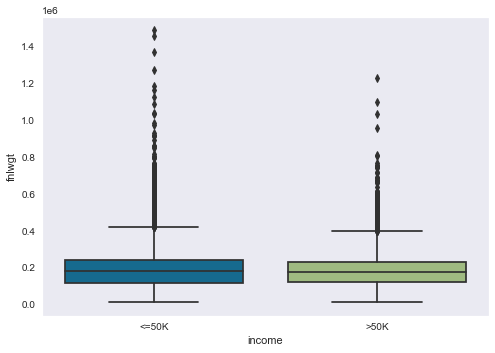

In [236]:
sns.boxplot(x='income', y='fnlwgt', data=censusIncome)

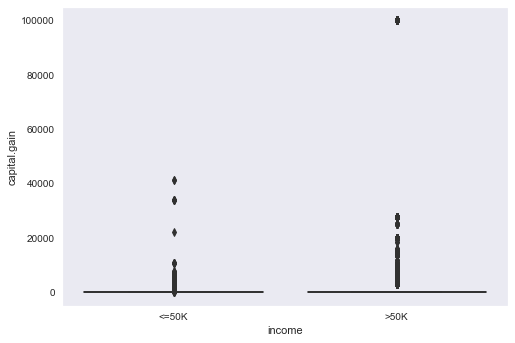

In [237]:
sns.boxplot(x='income', y='capital.gain', data=censusIncome)

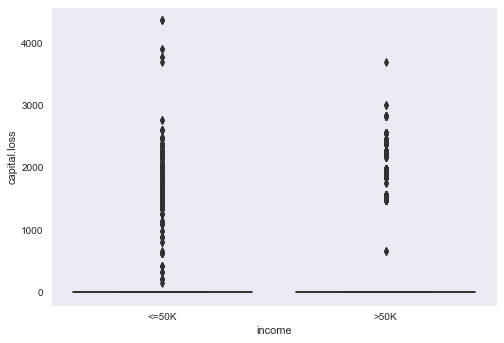

In [238]:
sns.boxplot(x='income', y='capital.loss', data=censusIncome)

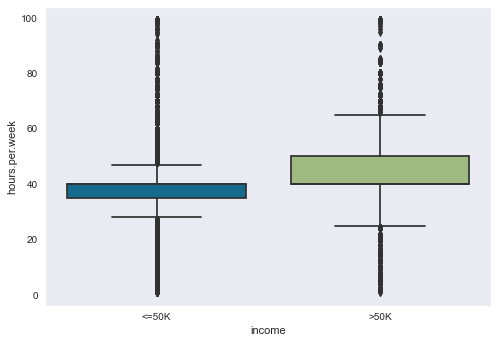

In [239]:
sns.boxplot(x='income', y='hours.per.week', data=censusIncome)

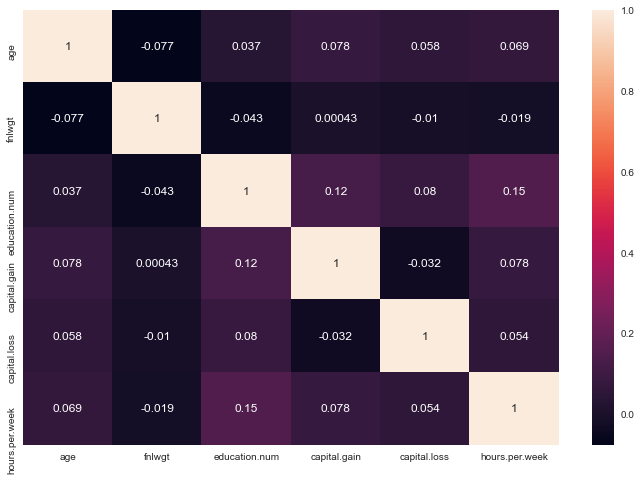

In [240]:
corr=censusIncome.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, annot=True)

In [241]:
censusIncome['income']=censusIncome['income'].map({'<=50K': 0, '>50K': 1})

In [242]:
censusIncome['sex'].value_counts()
censusIncome["sex"] = censusIncome["sex"].map({"Male": 0, "Female":1})

In [243]:
censusIncome['race'].value_counts()
censusIncome["race"] = censusIncome["race"].map(lambda x: 1 if x=='White' else 0)

In [244]:
censusIncome["marital.status"] = censusIncome["marital.status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
censusIncome["marital.status"] = censusIncome["marital.status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
censusIncome["marital.status"] = censusIncome["marital.status"].map({"Married":1, "Single":0})
censusIncome["marital.status"] = censusIncome["marital.status"].astype(int)

In [245]:
censusIncome['workclass']=censusIncome['workclass'].map(lambda x: 2 if x=='Private' else 0 if x=='Without-pay' or x=='Never-worked' else 1)

In [246]:
numeric_features = ['age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']
categorical_features = ['race', 'sex', 'occupation', 'marital.status', 'relationship', 'native.country']
ordinal_features = ['education.num', 'workclass']
drop_features = ['education']
target_features = ["income"]

In [247]:
preprocessor = make_column_transformer(
                    (StandardScaler(), numeric_features),  # scaling on numeric features
                    (OneHotEncoder(), categorical_features),  # OHE on categorical feature
                    (("drop"), drop_features),  # drop the drop features
                    )
preprocessor = make_column_transformer(
                    (StandardScaler(), numeric_features),  # scaling on numeric features
                    )

In [272]:
X=censusIncome.iloc[:, :-1]
X=censusIncome[['age', 'fnlwgt', 'capital.loss', 'capital.gain', 'hours.per.week', 'sex', 'race', 'marital.status', 'education.num']]
y=censusIncome.iloc[:, -1:]

In [273]:
normalizer = MinMaxScaler()
normalizer.fit(X.iloc[:, :5])
selected_cols = X.columns.tolist()[:5]
print(selected_cols)

X_norm_selected = pd.DataFrame(normalizer.transform(X.iloc[:, :5]), columns=selected_cols)
X = pd.concat([X.iloc[:, 5:], X_norm_selected], axis=1)

['age', 'fnlwgt', 'capital.loss', 'capital.gain', 'hours.per.week']


In [274]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1, test_size=0.2, stratify=y)

In [275]:
model=GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Accuracy
_accuracy = accuracy_score(y_test, y_pred)

_f1_score = f1_score(y_test, y_pred)
print('GaussianNB - accuracy score: {} and f1_score: {}'.format(_accuracy, _f1_score))
cm=confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))
print(f"TP accuracy {cm[1][1]/y_pred.shape[0]} & TN accuracy {cm[0][0]/y_pred.shape[0]}")

GaussianNB - accuracy score: 0.800706279748196 and f1_score: 0.43955094991364424
[[4706  239]
 [1059  509]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4945
           1       0.68      0.32      0.44      1568

    accuracy                           0.80      6513
   macro avg       0.75      0.64      0.66      6513
weighted avg       0.78      0.80      0.77      6513

TP accuracy 0.07815138952863504 & TN accuracy 0.7225548902195609


In [262]:
model=GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Accuracy
_accuracy = accuracy_score(y_test, y_pred)

_f1_score = f1_score(y_test, y_pred)
print('GaussianNB - accuracy score: {} and f1_score: {}'.format(_accuracy, _f1_score))
cm=confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))
print(f"TP accuracy {cm[1][1]/y_pred.shape[0]} & TN accuracy {cm[0][0]/y_pred.shape[0]}")

GaussianNB - accuracy score: 0.7964071856287425 and f1_score: 0.5851063829787233
[[4252  693]
 [ 633  935]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      4945
           1       0.57      0.60      0.59      1568

    accuracy                           0.80      6513
   macro avg       0.72      0.73      0.73      6513
weighted avg       0.80      0.80      0.80      6513

TP accuracy 0.14355903577460463 & TN accuracy 0.6528481498541379


In [91]:
model=BernoulliNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Accuracy
_accuracy = accuracy_score(y_test, y_pred)

_f1_score = f1_score(y_test, y_pred)
print('BernoulliNB - accuracy score: {} and f1_score: {}'.format(_accuracy, _f1_score))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

BernoulliNB - accuracy score: 0.7982496545370796 and f1_score: 0.37842951750236514
[[4799  146]
 [1168  400]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      4945
           1       0.73      0.26      0.38      1568

    accuracy                           0.80      6513
   macro avg       0.77      0.61      0.63      6513
weighted avg       0.79      0.80      0.76      6513



In [92]:
model=MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Accuracy
_accuracy = accuracy_score(y_test, y_pred)

_f1_score = f1_score(y_test, y_pred)
print('MultinomialNB - accuracy score: {} and f1_score: {}'.format(_accuracy, _f1_score))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

MultinomialNB - accuracy score: 0.7670812221710426 and f1_score: 0.06875383670963782
[[4940    5]
 [1512   56]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4945
           1       0.92      0.04      0.07      1568

    accuracy                           0.77      6513
   macro avg       0.84      0.52      0.47      6513
weighted avg       0.80      0.77      0.67      6513



In [93]:
y_test

,income
16528,0
11477,0
15735,1
17043,1
65,1
...,...
9214,0
3413,0
2143,1
14650,0


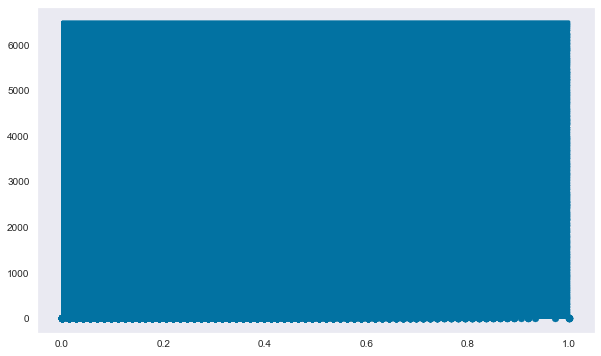

In [99]:
plt.figure(figsize=(10,6))
x_value=X_test.reset_index().index
plt.scatter(X_test.age, X_test.fnlwgt)
plt.plot(y_test, x_value)

In [75]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(10,6))
plot_decision_regions(X_test[['age', 'fnlwgt']].values, y_test.iloc[:,0].values, clf = model, legend = 2)
plt.title("Decision boundary using Naive Bayes (Test)")
# plt.xlabel("mean_perimeter")
# plt.ylabel("mean_texture")

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<Figure size 720x432 with 0 Axes>

In [100]:
X_test.columns

Index(['sex', 'race', 'marital.status', 'education.num', 'age', 'fnlwgt',
       'capital.gain', 'capital.loss', 'hours.per.week'],
      dtype='object')

In [122]:
# define bounds of the domain
min1, max1 = X_test.iloc[:, 4].min()-1, X_test.iloc[:, 4].max()+1
min2, max2 = X_test.iloc[:, 5].min()-1, X_test.iloc[:, 5].max()+1
min2, max2

# define the x and y scale
x1grid = np.arange(min1, max1, 0.2)
x2grid = np.arange(min2, max2, 0.2)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(X_test.iloc[:, 4].values, X_test.iloc[:, 5].values)



# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# make predictions for the grid
yhat = y_test.values

# reshape the predictions back into a grid
zz = xx.shape

TypeError: Input z must be 2D, not 1D

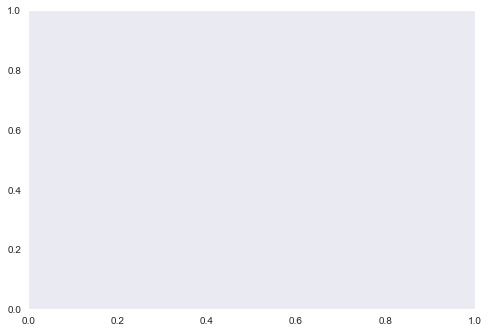

In [123]:

# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')

for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y == class_value)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')

In [272]:
seed=12
model=GaussianNB()
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
print(cv_results.mean(), cv_results.std())
y_pred = model.predict(X_test)

# Accuracy
lr_accuracy = accuracy_score(y_test, y_pred)
lr_f1_score = f1_score(y_test, y_pred)
print('LogisticRegression - accuracy score: {} and f1_score: {}'.format(lr_accuracy, lr_f1_score))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7929156429156429 0.010558521585295208


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

NotFittedError: This GaussianNB instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [267]:
pipe = make_pipeline(preprocessor, model) 
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['age', 'fnlwgt',
                                                   'capital.gain',
                                                   'capital.loss',
                                                   'hours.per.week']),
                                                 ('pipeline',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['race', 'sex', 'occupation',
                                                   'workclass',
                                                   'marita

In [239]:
model=GaussianNB()
pipe = make_pipeline(preprocessor, model) 
scores = cross_validate(pipe, X_train, y_train, cv=5, return_train_score=True)

mean_scores = pd.DataFrame(scores).mean()
mean_scores

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 2646, in get_loc
    return self._engine.get_loc(key)
  File "pandas\_libs\index.pyx", line 111, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 138, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 1619, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 1627, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'race'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\__init__.py", line 396,

fit_time       0.002398
score_time     0.000000
test_score          NaN
train_score         NaN
dtype: float64